# 数据聚类（clustering）

## K均值聚类

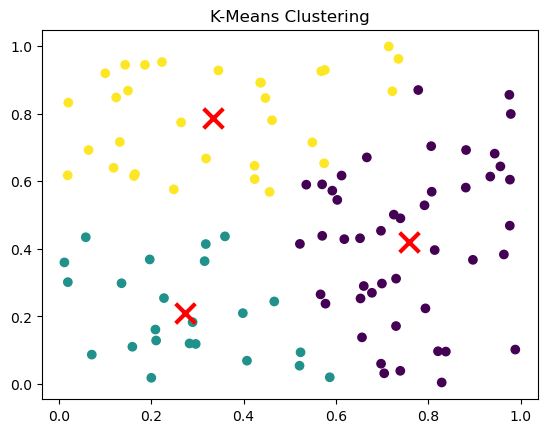

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 生成随机数据
np.random.seed(0)
X = np.random.rand(100, 2)

# 使用K均值聚类，假设要分成3个簇
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

# 获取簇的中心点和每个数据点的所属簇
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# 绘制数据点和簇中心
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('K-Means Clustering')
plt.show()
# 这段代码首先生成一些随机数据，然后使用scikit-learn库的KMeans类进行聚类，并绘制了数据点和簇中心的图形。

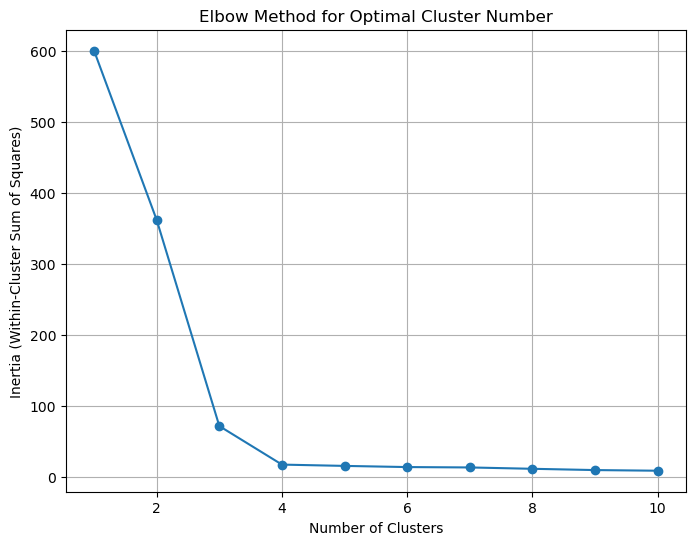

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成模拟数据
n_samples = 300
n_features = 2
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=4, random_state=42)

# 数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用肘部法则确定类别数
inertia_values = []
possible_clusters = range(1, 11)  # 尝试不同的类别数
for n_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init='auto')
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# 绘制肘部法则图
plt.figure(figsize=(8, 6))
plt.plot(possible_clusters, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.grid(True)
plt.show()

## 层次聚类

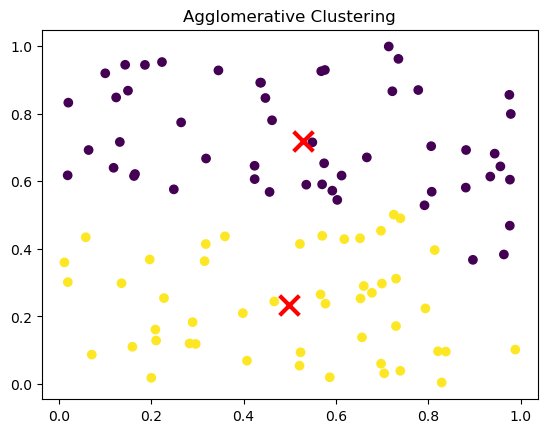

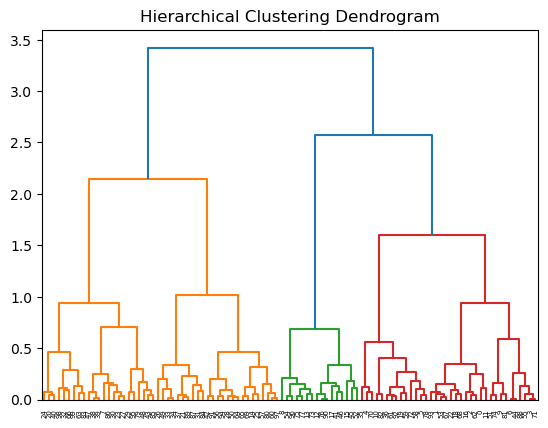

In [3]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 生成随机数据
np.random.seed(0)
X = np.random.rand(100, 2)

# 使用凝聚聚类，假设要分成2个簇
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(X)  # 直接使用 fit_predict 来获取标签

# 使用 scipy 计算链接矩阵
linkage_matrix = linkage(X, method='ward')  

# 计算每个簇的中心
centers = np.array([X[labels == i].mean(axis=0) for i in range(agg_clustering.n_clusters)])

# 绘制数据点和簇中心
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('Agglomerative Clustering')
plt.show()

# 绘制树状图
dendrogram(linkage_matrix, p=10, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

## 密度聚类

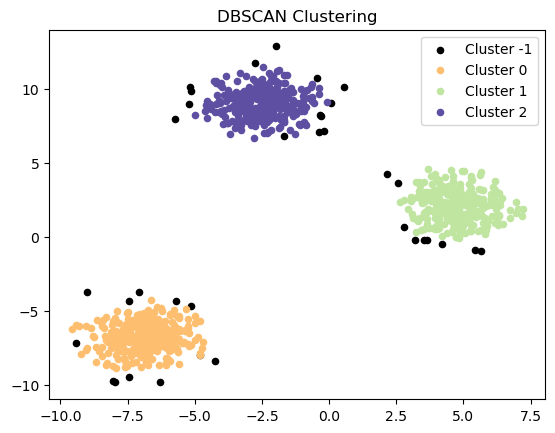

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# 创建一个随机数据集
X, _ = make_blobs(n_samples=1000, centers=3, cluster_std=1.0, random_state=42)

# 使用DBSCAN算法进行密度聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# 获取每个点的簇标签
labels = dbscan.labels_

# 绘制聚类结果
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, col in zip(unique_labels, colors):
    if label == -1:
        # 噪声点用黑色表示
        col = 'k'

    class_member_mask = (labels == label)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=col, s=20, label='Cluster %d' % label)

plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


## 谱聚类

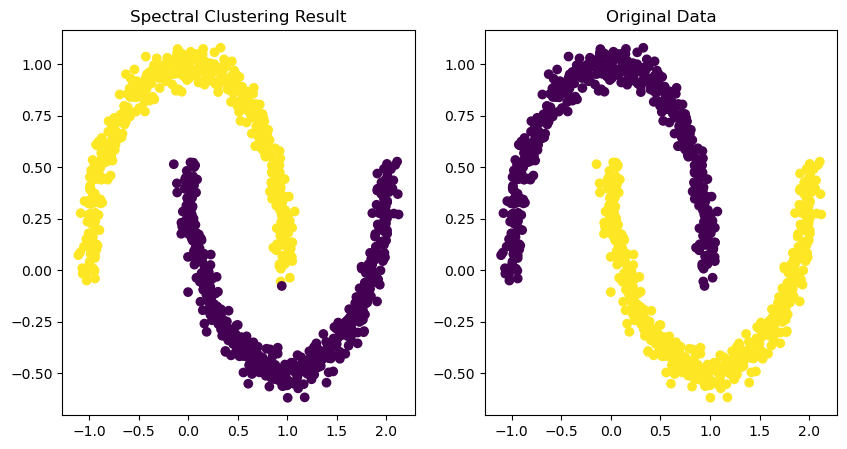

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from scipy.sparse import csgraph

# 生成一个随机的月亮形状的数据集
X, _ = make_moons(n_samples=1000, noise=0.05, random_state=42)

# 计算相似度矩阵
sigma = 0.2
W = np.exp(-pairwise_distances(X, metric="sqeuclidean") / (2.0 * sigma ** 2))

# 构建对称归一化拉普拉斯矩阵
D = np.diag(W.sum(axis=1))
L = D - W
D_sqrt_inv = np.linalg.inv(np.sqrt(D))
L_sym = np.dot(np.dot(D_sqrt_inv, L), D_sqrt_inv)

# 计算特征向量
k = 2  # 聚类数
eigenvalues, eigenvectors = np.linalg.eigh(L_sym)
X_new = eigenvectors[:, :k]

# 使用谱聚类
sc = SpectralClustering(n_clusters=k, affinity="precomputed", random_state=42)
labels = sc.fit_predict(W)

# 可视化结果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.title("Spectral Clustering Result")
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=_, cmap="viridis")
plt.title("Original Data")
plt.show()

## EM聚类

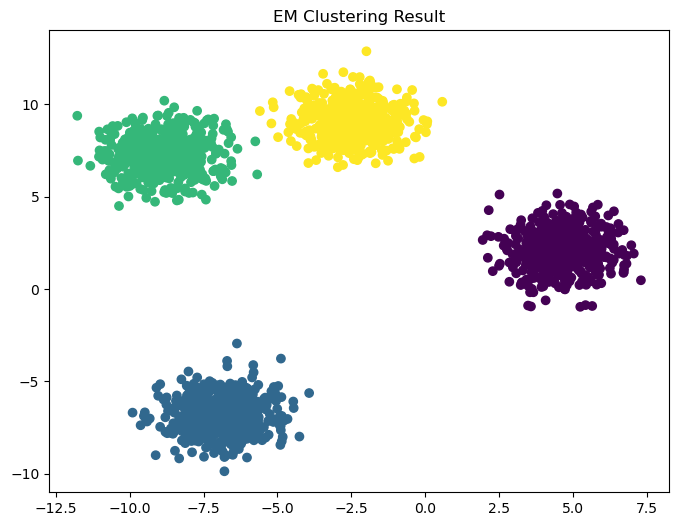

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# 生成一个随机的大型数据集
X, _ = make_blobs(n_samples=2000, centers=4, random_state=42)

# 使用EM聚类
gmm = GaussianMixture(n_components=4, random_state=42)
labels = gmm.fit_predict(X)

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.title("EM Clustering Result")
plt.show()

## 模糊聚类

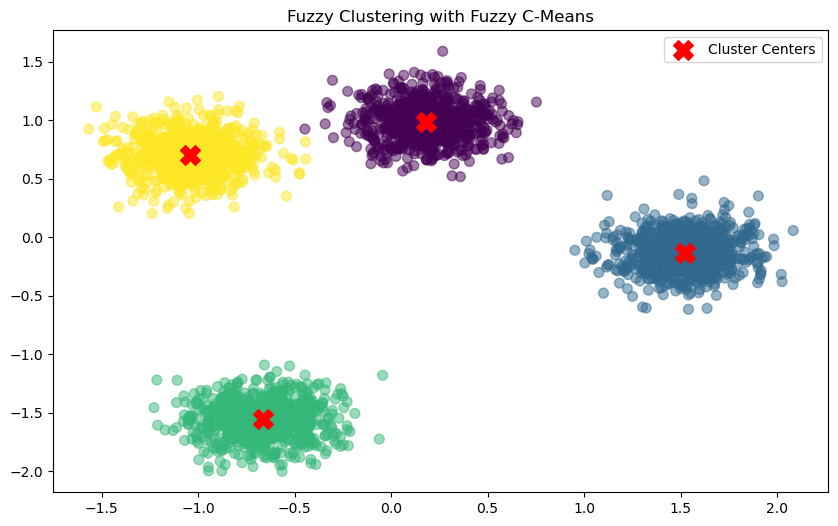

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import skfuzzy as fuzz

# 生成模拟数据
n_samples = 3000
n_features = 2
n_clusters = 4
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用Fuzzy C-Means进行模糊聚类
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, n_clusters, 2, error=0.005, maxiter=1000)

# 获取模糊聚类标签
fuzzy_labels = np.argmax(u, axis=0)

# 绘制模糊聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=fuzzy_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(cntr[:, 0], cntr[:, 1], marker='X', c='red', s=200, label='Cluster Centers')
plt.title('Fuzzy Clustering with Fuzzy C-Means')
plt.legend()
plt.show()


# 数据降维(Dimensionality reduction)

In [8]:
import pandas as pd
red_wine_df=pd.read_csv('wineQualityReds.csv',index_col=0)
red_wine_df
#red_wine_df.columns 

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
red_wine_df.isnull().sum()  

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
red_wine_df = pd.DataFrame(data = scaler.fit_transform(red_wine_df),
columns = red_wine_df.columns)
print(red_wine_df)

kmeans = KMeans(n_clusters = 3,n_init='auto')
cluster = kmeans.fit_predict(red_wine_df)

      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free.sulfur.dioxide  

## 线性方法

### PCA 主成分分析

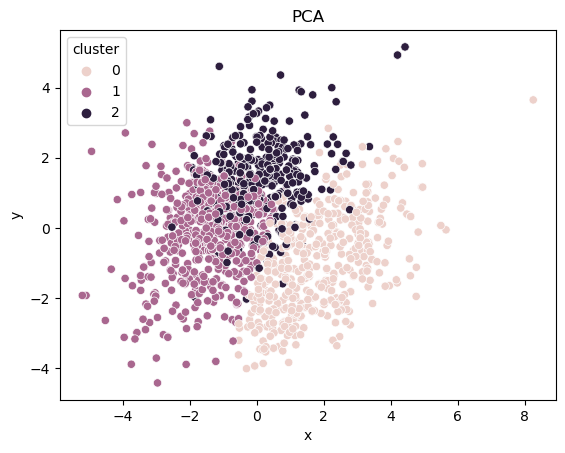

In [11]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca2D = PCA(n_components=2)
# 将数据降维到2维(dimensions)
pca_2D = pca2D.fit_transform(red_wine_df)
pca2D_df = pd.DataFrame(data =  pca_2D, columns = ['x', 'y'])

pca2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=pca2D_df)
plt.title("PCA")
plt.show()

### ICA 独立成分分析

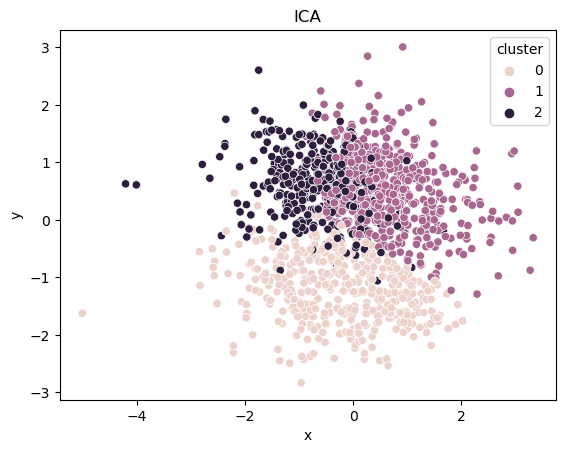

In [12]:
from sklearn.decomposition import FastICA

ica2D = FastICA(n_components=2,whiten='unit-variance')
ica_data2D = ica2D.fit_transform(red_wine_df)
ica2D_df = pd.DataFrame(data =  ica_data2D,columns = ['x', 'y'])

ica2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=ica2D_df)
plt.title("ICA")
plt.show()

### TruncatedSVD 截断奇异值分解

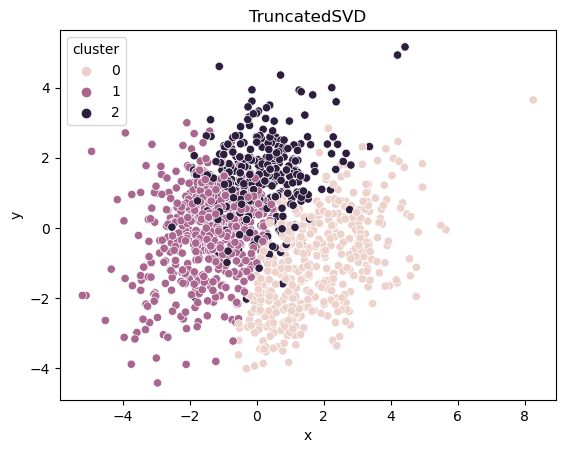

In [13]:
from sklearn.decomposition import TruncatedSVD

tsvd2D = TruncatedSVD(n_components=2)
tsvd_data2D = tsvd2D.fit_transform(red_wine_df)
tsvd2D_df = pd.DataFrame(data =  tsvd_data2D, columns = ['x', 'y'])

tsvd2D_df['cluster']  = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=tsvd2D_df)
plt.title("TruncatedSVD")
plt.show()

## 非线性(Non-linear)方法

### MDS（Multidimensional Scaling）

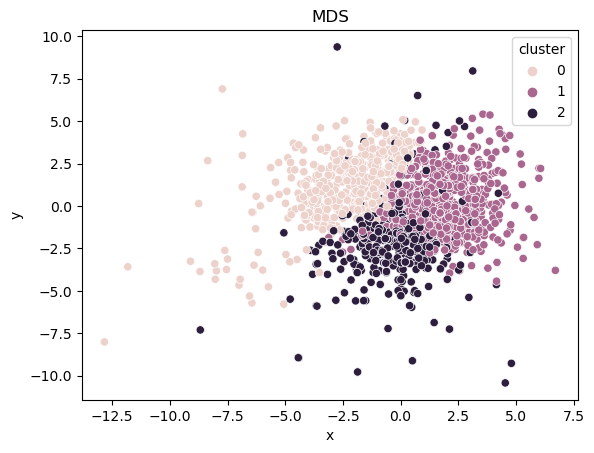

In [14]:
from sklearn.manifold import MDS

mds2D = MDS(n_components=2,normalized_stress='auto')

mds_data2D = mds2D.fit_transform(red_wine_df)
mds2D_df = pd.DataFrame(data =  mds_data2D, columns = ['x', 'y'])

mds2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=mds2D_df)
plt.title("MDS")
plt.show()

### T-SNE 

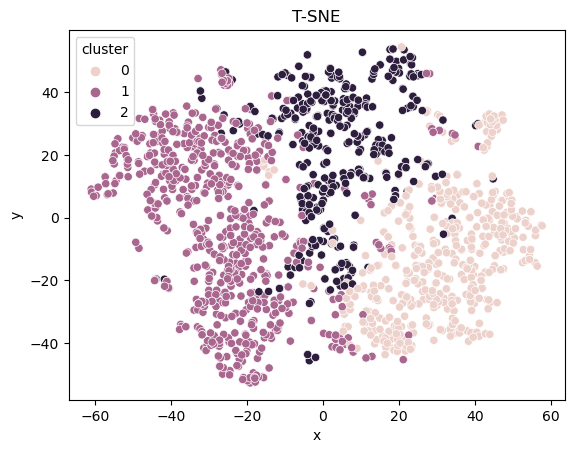

In [15]:
from sklearn.manifold import TSNE

tsne2D = TSNE(n_components=2)
tsne_data2D = tsne2D.fit_transform(red_wine_df)
tsne2D_df = pd.DataFrame(data =  tsne_data2D, columns = ['x', 'y'])

tsne2D_df['cluster'] = cluster

sns.scatterplot(x='x', y='y', hue='cluster', data=tsne2D_df)
plt.title("T-SNE")
plt.show()


### UMAP 